In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.integrate

In [2]:
#constants
hbar, m = 1, 1
k0, L = 20, 20
Nx = 1000 # number of x-values
dx = L / (Nx - 1)
sigmax = 1
x0 = 5

#Find values 
dt = 0.01
E = (hbar * k0) ** 2 / 2 / m
omega = E / hbar


def psi_I(x, t):
    return np.exp(-(x - x0)**2 / (2 * sigmax**2)) * np.sin(k0 * x - omega * t)
                  
def psi_R(x,t):
    return np.exp(-(x - x0)**2 / (2 * sigmax **2)) * np.cos(k0 * x - omega * t)

x = np.linspace(0, L, Nx)
psi_I_init = psi_I(x, 0)
psi_R_init = psi_R(x, 0)

C_0 = np.trapz(psi_I(x, 0)**2 + psi_R(x, 0)**2, dx = dx)
psi_R_init = psi_R(x, 0) / np.sqrt(C_0)

C_1 = np.trapz(psi_R(x, dt/ 2)**2 + psi_R(x, dt / 2)**2, dx = dx)
psi_I_init = psi_R(x, dt/2) / np.sqrt(C_1)

print(C_0, C_1)

1.7724538509041492 1.7724538509044656


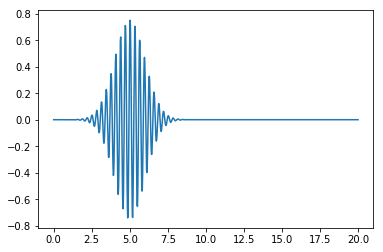

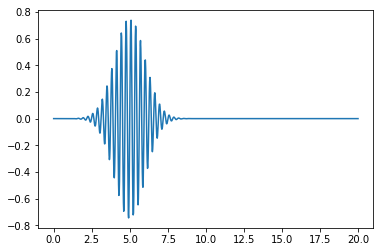

In [3]:
plt.plot(x, psi_R_init)

plt.show()
plt.plot(x, psi_I_init)
plt.show()